<a href="https://colab.research.google.com/github/WillS-gif/projeto_dados-_python_chamadas/blob/main/etl_chamadas_atendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Projeto de ELT com Python**

##🎯 Contexto do dataset

**Tema:** Chamadas de atendimento ao cliente

**Período:** últimos 6 meses

**Granularidade:** 1 linha = 1 chamada

**Objetivo:** analisar volume, motivos de contato, duração e comportamento mensal

##Setup inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime, timedelta

plt.rcParams['figure.figsize'] = (10, 6)

##Extract — Gerando o dataset simulado

In [3]:
random.seed(42)

qtd_registros = 3000
data_fim = datetime.today()
data_inicio = data_fim - timedelta(days=180)

canais = ['Voz', 'Chat', 'WhatsApp']

motivos = {
    'FATURAMENTO': ['BOLETO', 'VALOR INDEVIDO', '2ª VIA'],
    'SUPORTE TECNICO': ['SEM SINAL', 'LENTIDAO', 'INSTABILIDADE'],
    'CANCELAMENTO': ['DESISTENCIA', 'VALOR ALTO'],
    'INFORMACOES': ['PLANO', 'PROMOCAO', 'COBERTURA']
}

agentes = [
    'ANA SILVA', 'JOAO SANTOS', 'MARIA OLIVEIRA',
    'CARLOS LIMA', 'FERNANDA COSTA', 'PAULO ROCHA'
]

dados = []

for i in range(1, qtd_registros + 1):
    motivo = random.choice(list(motivos.keys()))
    submotivo = random.choice(motivos[motivo])

    dados.append({
        'interaction_id': i,
        'data_chamada': data_inicio + timedelta(
            minutes=random.randint(
                0, int((data_fim - data_inicio).total_seconds() / 60)
            )
        ),
        'cliente_id': random.randint(10000, 99999),
        'canal': random.choice(canais),
        'motivo': motivo,
        'submotivo': submotivo,
        'duracao_segundos': random.randint(60, 1800),
        'satisfacao': random.randint(1, 5),
        'agente': random.choice(agentes)
    })

df_raw = pd.DataFrame(dados)

df_raw.head()

,interaction_id,data_chamada,cliente_id,canal,motivo,submotivo,duracao_segundos,satisfacao,agente
0,1,2025-11-07 23:50:02.330166,46048,Voz,FATURAMENTO,BOLETO,517,2,PAULO ROCHA
1,2,2025-11-07 19:58:02.330166,81482,Voz,FATURAMENTO,2ª VIA,1269,4,ANA SILVA
2,3,2025-08-04 19:11:02.330166,40495,WhatsApp,FATURAMENTO,BOLETO,1292,1,FERNANDA COSTA
3,4,2025-10-22 07:20:02.330166,81426,Chat,SUPORTE TECNICO,INSTABILIDADE,511,4,FERNANDA COSTA
4,5,2025-11-11 03:13:02.330166,30926,WhatsApp,CANCELAMENTO,DESISTENCIA,925,3,MARIA OLIVEIRA


##Transform — limpeza e enriquecimento

In [4]:
df = df_raw.copy()

# Padronização
df['motivo'] = df['motivo'].str.upper().str.strip()
df['submotivo'] = df['submotivo'].str.upper().str.strip()
df['canal'] = df['canal'].str.upper()

# Tratamento de nulos (simulando problema real)
df.loc[df.sample(frac=0.03).index, 'submotivo'] = None
df['submotivo'] = df['submotivo'].fillna('NA')

# Conversões
df['data_chamada'] = pd.to_datetime(df['data_chamada'])
df['duracao_minutos'] = (df['duracao_segundos'] / 60).round(2)

# Colunas derivadas
df['ano_mes'] = df['data_chamada'].dt.to_period('M').astype(str)
df['chamada_longa'] = df['duracao_minutos'] > 10

df.head()


,interaction_id,data_chamada,cliente_id,canal,motivo,submotivo,duracao_segundos,satisfacao,agente,duracao_minutos,ano_mes,chamada_longa
0,1,2025-11-07 23:50:02.330166,46048,VOZ,FATURAMENTO,BOLETO,517,2,PAULO ROCHA,8.62,2025-11,False
1,2,2025-11-07 19:58:02.330166,81482,VOZ,FATURAMENTO,2ª VIA,1269,4,ANA SILVA,21.15,2025-11,True
2,3,2025-08-04 19:11:02.330166,40495,WHATSAPP,FATURAMENTO,BOLETO,1292,1,FERNANDA COSTA,21.53,2025-08,True
3,4,2025-10-22 07:20:02.330166,81426,CHAT,SUPORTE TECNICO,INSTABILIDADE,511,4,FERNANDA COSTA,8.52,2025-10,False
4,5,2025-11-11 03:13:02.330166,30926,WHATSAPP,CANCELAMENTO,DESISTENCIA,925,3,MARIA OLIVEIRA,15.42,2025-11,True


##Load — salvar dados tratados

In [5]:
df.to_csv('chamadas_atendimento_tratadas.csv', index=False)

print('Arquivo salvo com sucesso!')


Arquivo salvo com sucesso!


In [6]:
#/* Para baixar o arquivo */
from google.colab import files
files.download('chamadas_atendimento_tratadas.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Análise exploratória dos Dados 📊

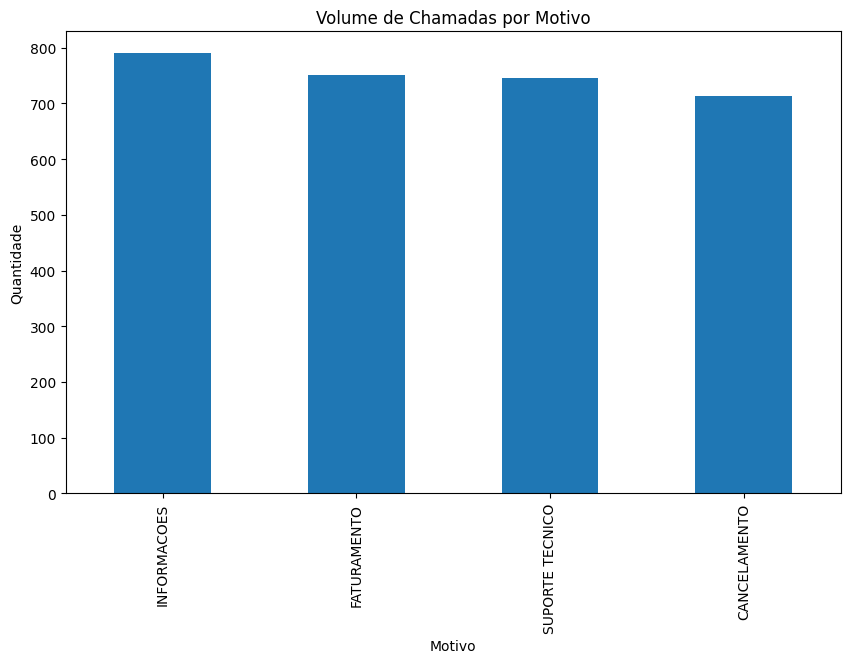

In [7]:
#/* Volumetria por motivo das chamadas */
df['motivo'].value_counts().plot(kind='bar')
plt.title('Volume de Chamadas por Motivo')
plt.xlabel('Motivo')
plt.ylabel('Quantidade')
plt.show()


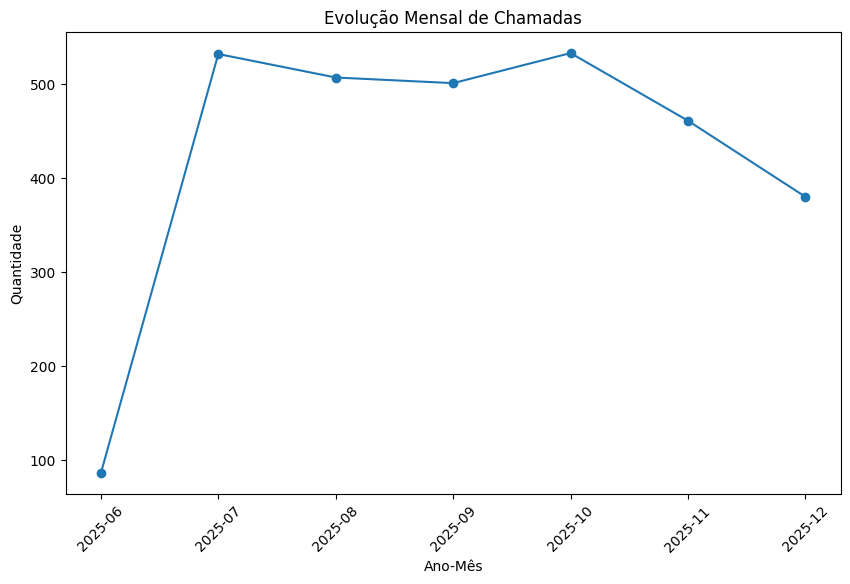

In [10]:
#/* Volumetria por mês */

df.groupby('ano_mes')['interaction_id'].count().plot(marker='o')
plt.title('Evolução Mensal de Chamadas')
plt.xlabel('Ano-Mês')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


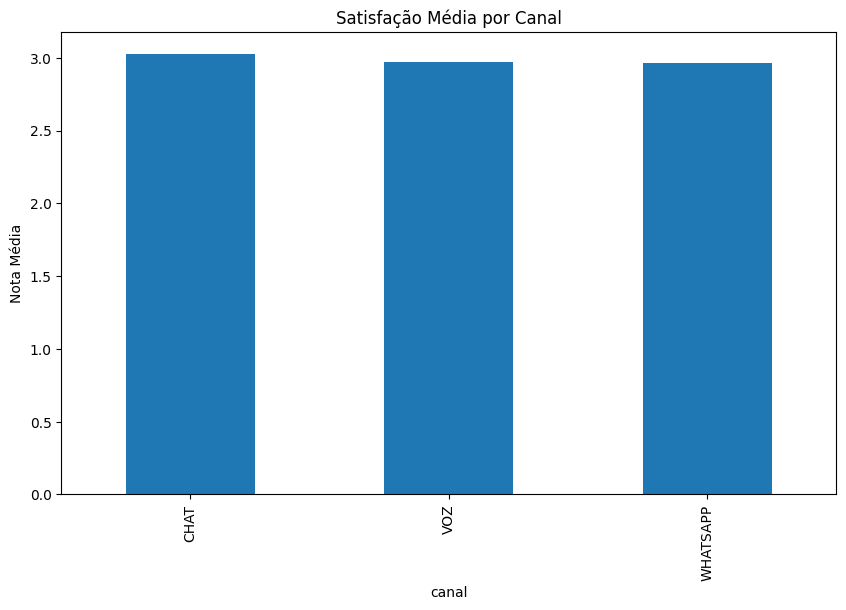

In [9]:
#/* Média de Satisfação do cliente por canal*/
df.groupby('canal')['satisfacao'].mean().plot(kind='bar')
plt.title('Satisfação Média por Canal')
plt.ylabel('Nota Média')
plt.show()
